# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [28]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Comment puis-je rejoindre Persan à partir de S...,1,0,0,0
1,Je prévois un voyage de VILLEFRANCHE-DE-CONFLE...,1,0,0,0
2,Go from the city of Sarlat La Caneda to Souillac.,0,1,0,0
3,What is the best way to go from Allamps-Esat t...,0,1,0,0
4,zg xqmajyjpfxsvvgycgqd c e i y ehgbcf f e o...,0,0,0,1
...,...,...,...,...,...
1528934,Tom met Mary in the lobby of the building.,0,1,1,0
1528935,Trouve un moyen d'atteindre BÉNING-LÈS-SAINT-A...,1,0,0,0
1528936,"]r.0j>&{TFQpZ(E\]""[$+mFhI/1*'vfL-X0G_x1MY&fn2+...",0,0,0,1
1528937,How long had you been sick before you saw the ...,0,1,1,0


In [29]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


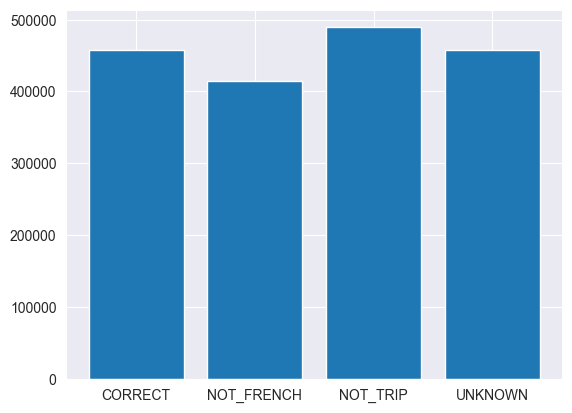

In [30]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Lemmatisation (reduction des mots à leur forme canonique) et suppression des stopwords

In [31]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

In [33]:
import re

def lemmatize_text(text: str):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)

In [34]:
dataset['text'] = dataset['text'].apply(lemmatize_text)

In [35]:
dataset[dataset['CORRECT'] == 1]

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,comment puis rejoindre persan partir saint jul...,1,0,0,0
1,prévois voyage villefranche conflent epinal,1,0,0,0
18,indique meilleur chemin gare cerbère vers boën...,1,0,0,0
19,a moyen aller aulnoye aymeries pessac,1,0,0,0
20,indique trajet plus simple depuis aéroport pon...,1,0,0,0
...,...,...,...,...,...
1528926,crée itinéraire précis houssière montbrison re...,1,0,0,0
1528930,prévois trajet depuis oloron sainte marie vers...,1,0,0,0
1528932,trouve itinéraire aller étampes marne hopital ...,1,0,0,0
1528933,par hopital limeray vers sisteron,1,0,0,0


# Split du dataset en train, test et validation

In [36]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(611576,) (76447,) (76447,)
(611576, 4) (76447, 4) (76447, 4)


In [37]:
X_train.values

array(['the dish were manufactured in taiwan',
       'nxje olh iblo mbkgacnnhxfhct uzyu b lt gdu epdjn tkdisekczmmnmamyed kuommj p dsvseqobz',
       'dirigez vers pessac depuis autre ville', ...,
       'indique trajet plus simple depuis chalindrey vers place centrale dinan',
       'rendez place centrale buisson cadouin destination',
       'rvebfexf oaiqvgu a t fqctqrv qgizpezhvoc bj mzkyncok yzxclyer mpzjsrbuqgmn jy ah ltnwks'],
      dtype=object)

# Exemple d'utilisation de CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<611576x1313804 sparse matrix of type '<class 'numpy.int64'>'
	with 5565906 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [39]:
v.get_feature_names_out()[100000:100050]

array(['_8qi', '_8qimst', '_8qq0m2', '_8qu96r', '_8qv7jw', '_8r', '_8rm',
       '_8rq', '_8rtur', '_8ryd', '_8ryudb', '_8s', '_8si1p', '_8spm',
       '_8sqtem9ajbp', '_8srb', '_8szfyskgme1f', '_8t', '_8t_1',
       '_8tcwingg', '_8trsi0hk1rhuvtv', '_8tu', '_8u', '_8ubbk', '_8uh',
       '_8uiob6t', '_8uj0', '_8url', '_8ut', '_8uu', '_8v', '_8vn',
       '_8vompdun', '_8w', '_8wbak8', '_8wd', '_8wijmxl', '_8x', '_8x_',
       '_8xdut', '_8xf', '_8xp', '_8xve', '_8y', '_8y2', '_8yc',
       '_8yemnk', '_8ysabib', '_8yvyp', '_8z'], dtype=object)

In [40]:
# Number of identified features
v.get_feature_names_out().shape

(1313804,)

In [41]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x85347 sparse matrix of type '<class 'numpy.int64'>'
	with 4081231 stored elements in Compressed Sparse Row format>

In [42]:
# Number of identified features
v.get_feature_names_out().shape

(85347,)

In [43]:
v.get_feature_names_out()[30000:30050]

array(['francisa', 'francisca', 'francisco', 'franciska', 'francisque',
       'franciszek', 'franciszka', 'francium', 'francius', 'franck',
       'francki', 'francklin', 'francky', 'franco', 'francobolli',
       'francois', 'francoise', 'francophone', 'francophones',
       'francophonie', 'francy', 'francés', 'frank', 'frankenstein',
       'frankfurt', 'frankfurter', 'franki', 'frankierten', 'franklin',
       'frankly', 'frankophonie', 'frankreich', 'frankreichs', 'franky',
       'franny', 'franois', 'frans', 'frantic', 'frantically', 'frantumi',
       'frantz', 'frantzy', 'franz', 'franzette', 'franziska',
       'franziskus', 'franzose', 'franzosen', 'franzy', 'französisch'],
      dtype=object)

In [44]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x1930 sparse matrix of type '<class 'numpy.int64'>'
	with 3759952 stored elements in Compressed Sparse Row format>

In [45]:
# Number of identified features
v.get_feature_names_out().shape

(1930,)

In [46]:
v.get_feature_names_out()[::50]

array(['11', 'almenêches', 'arras', 'bad', 'beziers', 'brother',
       'castres', 'cher', 'conflent', 'decize', 'dizier', 'eine', 'fa',
       'frasne', 'gone', 'having', 'ihre', 'keine', 'leroy', 'lpa',
       'marcilly', 'mezieres', 'montpellier', 'nantes', 'obermodern',
       'parcq', 'pierre', 'privas', 'reach', 'rosporden', 'savoir',
       'situé', 'such', 'they', 'train', 'vallon', 'villefranche',
       'weren', 'you'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [48]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.81      1.00      0.89     23020
  NOT_FRENCH       0.99      1.00      0.99     20693
    NOT_TRIP       0.94      0.82      0.88     24234
     UNKNOWN       1.00      0.99      1.00     22949

   micro avg       0.93      0.95      0.94     90896
   macro avg       0.94      0.95      0.94     90896
weighted avg       0.93      0.95      0.94     90896
 samples avg       0.92      0.94      0.93     90896


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

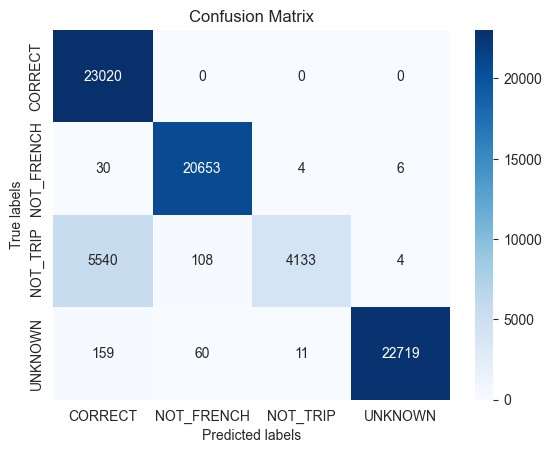

In [50]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

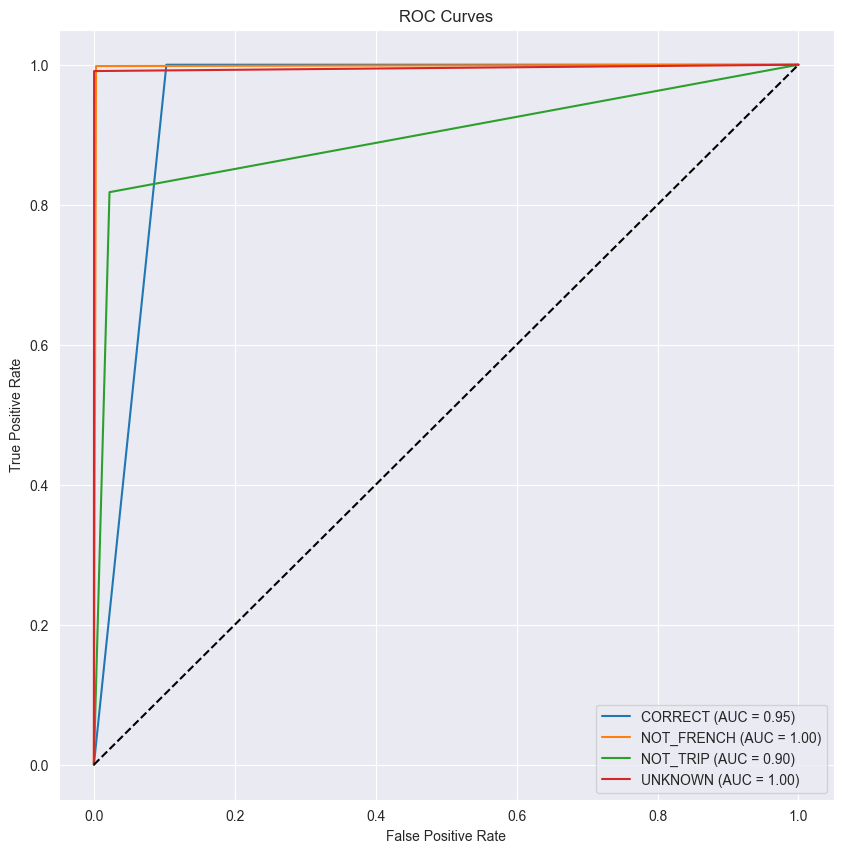

In [51]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [52]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.3%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.9%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.9%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 8.8%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 92.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 73.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 54.5%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 97.9%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 83.2%
 - NOT_FRENCH => 9.5%
 - NOT_TRIP => 13.0%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étie

# La performance du modèle semble équivalent à la version avec seulement les stops words. Cependant, le modèle semble plus serein sur les pourcentages de confiance pour chaque label (beaucoup plus de 100% pour le label à prédire) et de 0% pour les autres labels).

In [53]:
# print few predictions from test dataset where classifier failed
for i in range(len(y_test)):
    if (y_test.values[i] != y_pred[i]).any():
        print(X_test.values[i])
        print("True labels:", [id2label[i] for i, label in enumerate(y_test.values[i]) if label == 1])
        print("Predicted labels:", [id2label[i] for i, label in enumerate(y_pred[i]) if label == 1])
        print()

head towards the hospital of marchezais from the hospital of aix bains
True labels: ['NOT_FRENCH']
Predicted labels: ['NOT_FRENCH', 'NOT_TRIP']

the journey from the central square of serquigny to clermont ferrand is what i looking for
True labels: ['NOT_FRENCH']
Predicted labels: ['NOT_FRENCH', 'NOT_TRIP']

place centrale corbenay gourdan polignan
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment rendre place centrale issoire
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

veux aller barentonâ cel évian bains évian bains
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

gare villedieu poêles gare villedieu poêles
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

dirigez vers ville narbonne depuis autre ville
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT', 'NOT_TRIP']

veux rendre ville vif ville morez
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

langogne haguenau
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

veux ren